In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()

In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
import pandas as pd
wine_df = pd.DataFrame(wine["data"], columns = wine["feature_names"] ) # it's a dictionary so you have to call the wine and input the key
wine_df['target'] = wine["target"]
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:

wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
wine_df.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [9]:
wine_df.isna().sum() #no null values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:

np.random.seed(42)
# create the data
x = wine_df.drop("target", axis = 1)
y = wine_df["target"] 

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [12]:
wine_df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [13]:
# (a) Logistic Regression
logreg = LogisticRegression(max_iter=10000)
%time logreg.fit(X_train, y_train)
#took 359 milli secs to train

CPU times: total: 438 ms
Wall time: 440 ms


LogisticRegression(max_iter=10000)

In [14]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [15]:
# (b) Support Vector Machine
svm = SVC()
%time svm.fit(X_train, y_train)
#took 2.1 milli secs to train

CPU times: total: 15.6 ms
Wall time: 3.44 ms


SVC()

In [16]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

In [17]:
# (c) Decision Tree
tree = DecisionTreeClassifier(random_state=42) # random_state =42 : this ensures the decision trees are replicable if the code is reran
%time tree.fit(X_train, y_train)
#took 11.3 milli secs to train


CPU times: total: 0 ns
Wall time: 2 ms


DecisionTreeClassifier(random_state=42)

In [18]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [19]:
# Evaluation
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.

In [20]:
# Accuracy summary
print("\nAccuracy Scores:")
print(f"Logistic Regression: {(accuracy_score(y_test, y_pred_logreg))*100 :.2f}%")
print(f"SVM: {(accuracy_score(y_test, y_pred_svm))*100:.2f}%")
print(f"Decision Tree: {(accuracy_score(y_test, y_pred_tree))*100:.2f}%")


Accuracy Scores:
Logistic Regression: 100.00%
SVM: 80.56%
Decision Tree: 94.44%


In [21]:
# Feature Importance from Decision Tree
importances = tree.feature_importances_ #this is onloy for tree based models
feature_importance_df = pd.DataFrame({
    'feature': wine['feature_names'],
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [22]:
print("\nFeature Importances (Decision Tree):")
print(feature_importance_df)


Feature Importances (Decision Tree):
                         feature  importance
6                     flavanoids    0.411053
9                color_intensity    0.384934
12                       proline    0.164075
2                            ash    0.020942
0                        alcohol    0.018995
1                     malic_acid    0.000000
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000
11  od280/od315_of_diluted_wines    0.000000


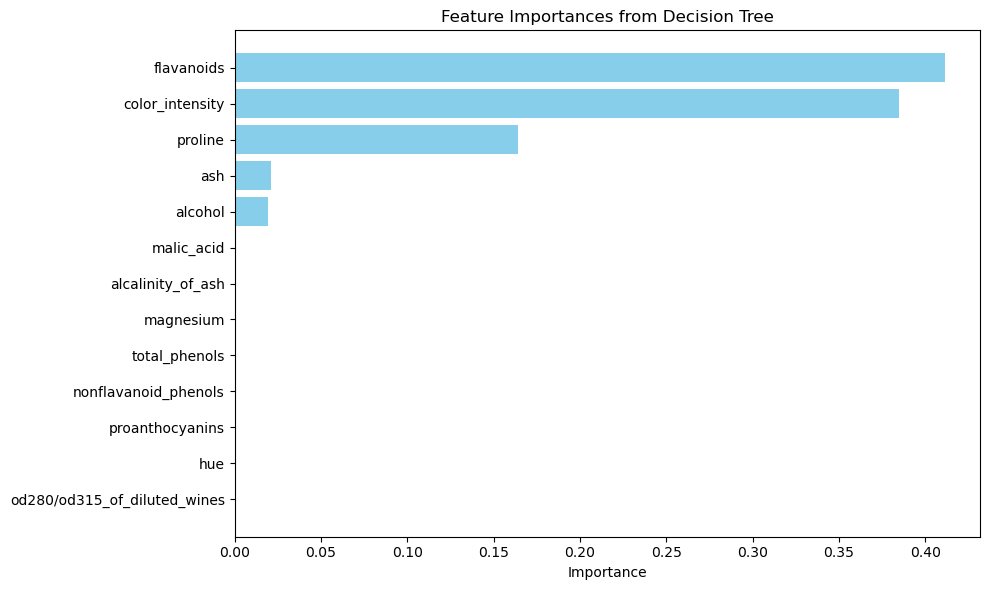

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importances from Decision Tree")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
# Feature importance using Logistic Regression coefficients
logreg_coeff = pd.DataFrame({
    'feature': wine['feature_names'],
    'coefficient': np.abs(logreg.coef_).mean(axis=0)  # Take mean abs for multiclass
}).sort_values(by='coefficient', ascending=False)

print("\nLogistic Regression Coefficient Importance:")
print(logreg_coeff)




Logistic Regression Coefficient Importance:
                         feature  coefficient
6                     flavanoids     0.771254
9                color_intensity     0.700289
2                            ash     0.551851
1                     malic_acid     0.517661
11  od280/od315_of_diluted_wines     0.483916
0                        alcohol     0.436377
8                proanthocyanins     0.298334
5                  total_phenols     0.235718
10                           hue     0.205235
3              alcalinity_of_ash     0.141610
7           nonflavanoid_phenols     0.080478
4                      magnesium     0.023326
12                       proline     0.005860


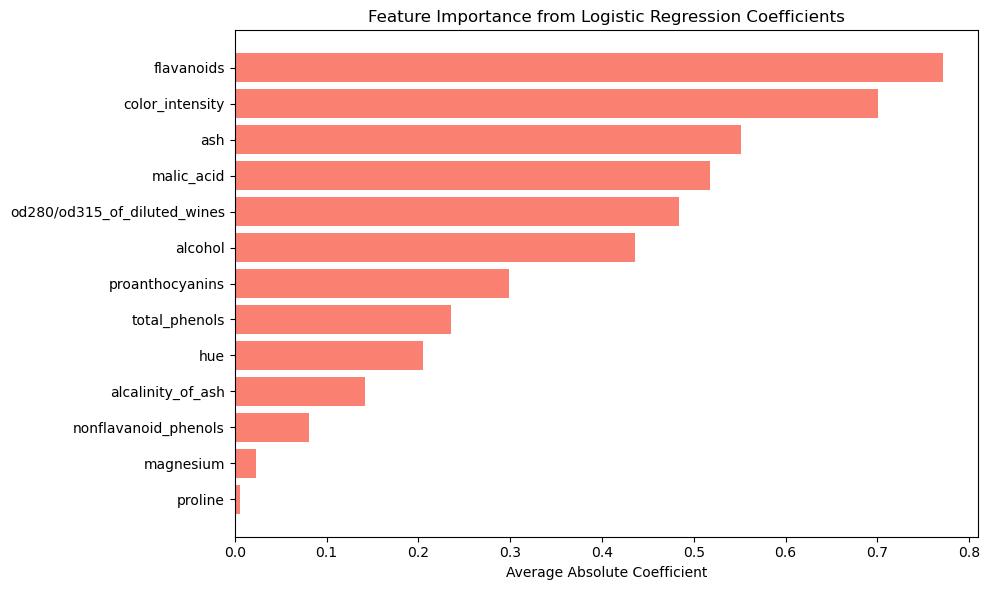

In [25]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(logreg_coeff['feature'], logreg_coeff['coefficient'], color='salmon')
plt.xlabel("Average Absolute Coefficient")
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.datasets import load_breast_cancer


In [27]:
breastC = load_breast_cancer()

In [28]:
breastC

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [102]:
breastC_df = pd.DataFrame(breastC["data"], columns = breastC["feature_names"] ) # it's a dictionary so you have to call the wine and input the key
breastC_df['target'] = breastC["target"]
breastC_df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [30]:
breastC_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [31]:
breastC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
breastC_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [33]:
np.random.seed(42)
# create the data
X = breastC_df.drop("target", axis = 1)
Y= breastC_df["target"] 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
# (a) Logistic Regression
logregB = LogisticRegression(max_iter=10000)
logregB.fit(X_train, y_train)
y_pred_logregB = logregB.predict(X_test)

# (b) Support Vector Machine (trained on breast cancer data)
svmB = SVC()
svmB.fit(X_train, y_train)
y_pred_svmB = svmB.predict(X_test)


# (c) Decision Tree (trained on breast cancer data)
treeB = DecisionTreeClassifier(random_state=42)
treeB.fit(X_train, y_train)
y_pred_treeB = treeB.predict(X_test)




In [35]:
# (a) Logistic Regression Report
print("=== Logistic Regression (Breast Cancer) ===")
print(classification_report(y_test, y_pred_logregB))

# (b) Support Vector Machine Report
print("=== Support Vector Machine (Breast Cancer) ===")
print(classification_report(y_test, y_pred_svmB))

# (c) Decision Tree Classifier Report
print("=== Decision Tree Classifier (Breast Cancer) ===")
print(classification_report(y_test, y_pred_treeB))

=== Logistic Regression (Breast Cancer) ===
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

=== Support Vector Machine (Breast Cancer) ===
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

=== Decision Tree Classifier (Breast Cancer) ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.9

In [36]:
# Accuracy summary
print(f"Logistic Regression: {(accuracy_score(y_test, y_pred_logregB) * 100):.2f}%")
print(f"Support Vector Machine: {(accuracy_score(y_test, y_pred_svmB) * 100):.2f}%")
print(f"Decision Tree: {(accuracy_score(y_test, y_pred_treeB) * 100):.2f}%")


Logistic Regression: 95.61%
Support Vector Machine: 94.74%
Decision Tree: 94.74%


In [37]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print("Random Forest Classifier Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [39]:
from sklearn.metrics import accuracy_score

print(f"Logistic Regression: {(accuracy_score(y_test, y_pred_logregB) * 100):.2f}%")
print(f"Support Vector Machine: {(accuracy_score(y_test, y_pred_svmB) * 100):.2f}%")
print(f"Decision Tree: {(accuracy_score(y_test, y_pred_treeB) * 100):.2f}%")
print(f"Random Forest: {(accuracy_score(y_test, y_pred_rf) * 100):.2f}%")


Logistic Regression: 95.61%
Support Vector Machine: 94.74%
Decision Tree: 94.74%
Random Forest: 96.49%


## RANDOM FOREST CLASSIFIER DID A 96.49%

In [41]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load data
breastC = load_breast_cancer()
X = pd.DataFrame(breastC.data, columns=breastC.feature_names)

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Evaluate
score = silhouette_score(X, labels)
print(f"KMeans Silhouette Score : {score:.2f}")

import warnings
warnings.filterwarnings('ignore') 
#gets rid of warning  


KMeans Silhouette Score : 0.70


C:\Users\EZEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [43]:
X['cluster'] = labels
X['target'] = breastC.target

# Crosstab
print(pd.crosstab(X['cluster'], X['target']))


target     0    1
cluster          
0        130    1
1         82  356


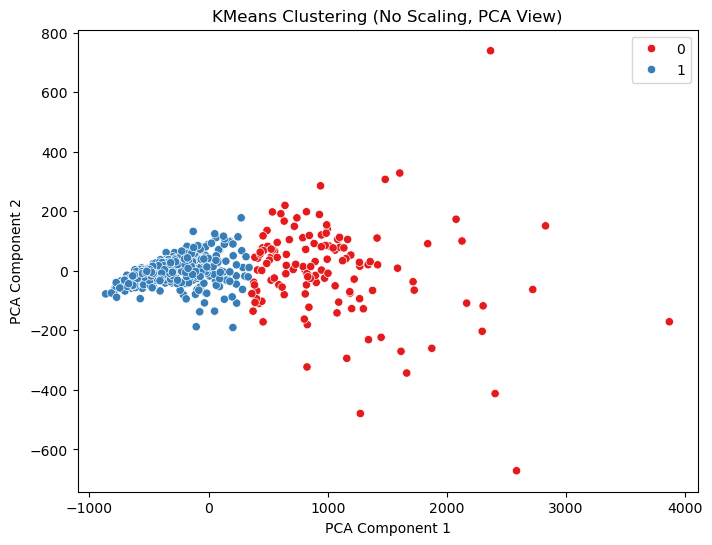

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(['cluster', 'target'], axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1')
plt.title("KMeans Clustering (No Scaling, PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



In [45]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'breast_cancer_model.pkl')

# Also save feature names
joblib.dump(X.columns.tolist(), 'features.pkl')


['features.pkl']

In [46]:
pip install --python


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\EZEEN\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\EZEEN\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\EZEEN\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\EZEEN\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\EZEEN\anaconda3\python.exe -m pip install [options] <archive url/path> ...

--python option requires 1 argument
